In [1]:
using PyPlot, BenchmarkTools, SciPy, Optim, Statistics 

In [2]:
using PSFJ
using PSFJ.PsfUtil
using PSFJ.KernelUtil

Precompiling PSFJ
  ✓ PSFJ
  1 dependency successfully precompiled in 3 seconds. 197 already precompiled.


# Import testing star-list

In [3]:
#=
In PsfJ, the star list is in form of Vector of Matrix,
note that the Vector of Matrix is different from 3-d array in Julia
=#

In [4]:
star_list = PSFJ.PsfUtil.JwstExampleStars();

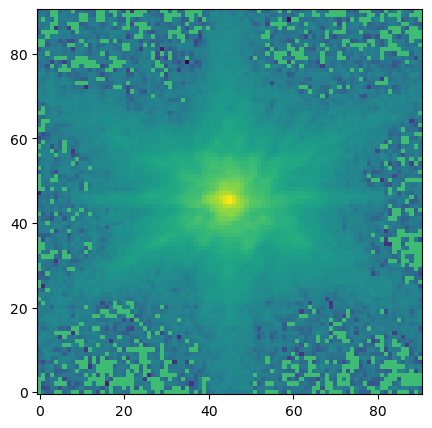

PyObject <matplotlib.image.AxesImage object at 0x71f4f0379760>

In [5]:
# Show up the first star image
fig = plt.figure(figsize=(5,5))
plt.imshow(PsfUtil.log10_scale(star_list[1]'), origin="lower")

In [6]:
plt.close()

# PSF

In [7]:
# Define the kwargs of PSF
kwargs_psf_stacking = Dict(:stacking_option=>"mean")
# Stacking method, optional {"mean",  "median" or "median_weight"}

kwargs_one_step=Dict(:verbose=>false, 
                 :oversampled_residual_deshifting=>true,
                 :step_factor=>0.5,
                 :deshift_order=>1);

In [8]:
psf_guess, center_list_psfr, mask_list, amplitude_list= PSFJ.StackPsf(star_list; oversampling=1, 
                                                  saturation_limit=nothing, num_iteration=20, 
                                                  n_recenter=5, kwargs_psf_stacking=kwargs_psf_stacking,
                                                kwargs_one_step=kwargs_one_step);

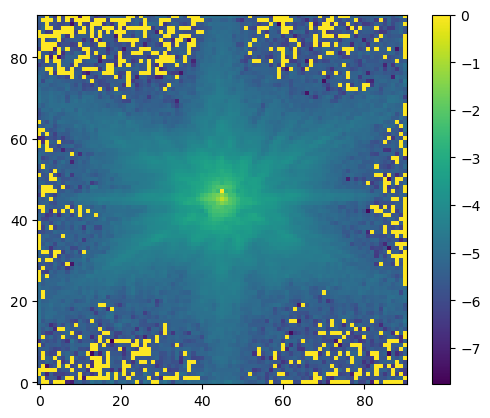

PyObject <matplotlib.colorbar.Colorbar object at 0x71f4e4d55a90>

In [9]:
plt.imshow(PsfUtil.log10_scale(psf_guess'),origin="lower")
plt.colorbar()

In [10]:
plt.close()

# OverSampling PSF

In [11]:
kwargs_psf_stacking = Dict(:stacking_option=>"mean")
# Stacking method, optional {"mean",  "median" or "median_weight"}

kwargs_one_step=Dict(:verbose=>false, 
                 :oversampled_residual_deshifting=>true,
                 :step_factor=>0.5,
                 :deshift_order=>1);

In [12]:
psf_psfr_super, center_list_psfr_super, mask_list, amplitude_list_super = PSFJ.StackPsf(star_list; oversampling=4, 
                                                                        saturation_limit=nothing, num_iteration=15, 
                                                                        n_recenter=5, kwargs_psf_stacking=kwargs_psf_stacking,
                                                                        kwargs_one_step=kwargs_one_step);

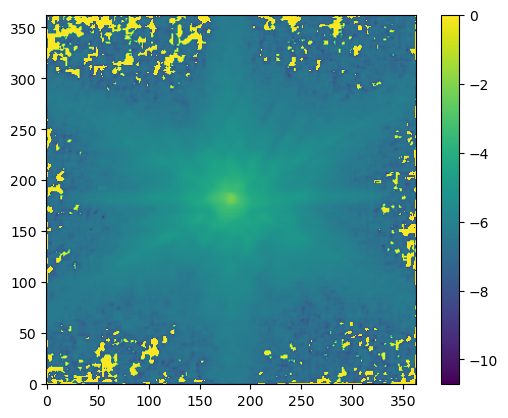

PyObject <matplotlib.colorbar.Colorbar object at 0x71f4e495bc50>

In [13]:
plt.imshow(PsfUtil.log10_scale(psf_psfr_super'),origin="lower")
plt.colorbar()

In [14]:
plt.close()

# Degraded oversampling PSF

In [15]:
psf_psfr_super_degraded = KernelUtil.DegradeKernel(psf_psfr_super, 4)
psf_psfr_super_degraded = KernelUtil.CutPsf(psf_psfr_super_degraded, 91);

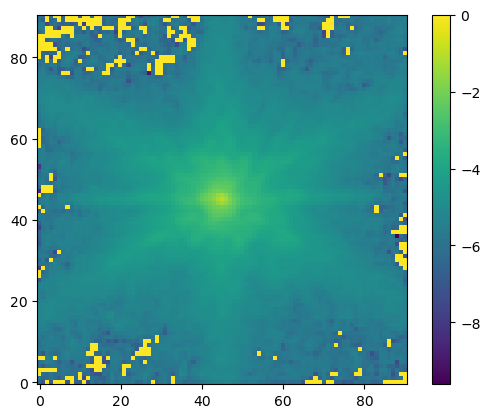

PyObject <matplotlib.colorbar.Colorbar object at 0x71f4e452cbc0>

In [16]:
plt.imshow(PsfUtil.log10_scale(psf_psfr_super_degraded'),origin="lower")
plt.colorbar()

In [17]:
plt.close()

# Error map

In [18]:
error_map = PSFJ.PsfErrorMap(star_list, psf_psfr_super_degraded, center_list_psfr_super);

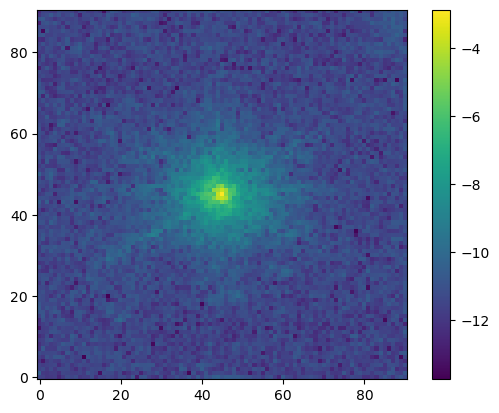

PyObject <matplotlib.colorbar.Colorbar object at 0x71f4e49d6870>

In [19]:
plt.imshow(PsfUtil.log10_scale(error_map'),origin="lower")
plt.colorbar()

In [20]:
plt.close()